## TODO:
* when eta is high, the battery will charge and discharge more often. This leads to alot of dots in the 2nd figure. 
* run code for 2 setups with high (realistic) and low eta

In [220]:
%load_ext autoreload
%autoreload 2
from tools import EnergyStorageModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [221]:
import numpy as np
# how do align 

## ETA HIGH

In [255]:
# Example Usage:
model = EnergyStorageModel(eta_charge=0.98, 
                           eta_discharge=0.97, 
                           beta = 0.9999,
                           a_bar = 4,
                           num_storage_levels=20,
                           num_actions=21,
                           num_price_levels=5,
                           simulate_prices = True,
                           tolerance = 1e-2,
                           max_iteration=100_000)


Simulating price series...


In [256]:
v2, p2 = model.vfi_vec()

fuck
Converged in 82297 iterations.
iterations: 82297


In [261]:
v2

array([[375225.38, 375072.49, 374969.79, 374930.04, 374883.22],
       [375243.08, 375096.93, 374996.85, 374966.55, 374931.35],
       [375261.71, 375121.14, 375023.73, 375003.06, 374979.48],
       [375280.91, 375145.82, 375050.31, 375039.57, 375027.62],
       [375296.27, 375168.84, 375077.38, 375081.71, 375084.99],
       [375305.36, 375189.07, 375104.34, 375118.22, 375133.13],
       [375315.73, 375209.9 , 375130.86, 375154.73, 375181.26],
       [375328.55, 375231.77, 375157.9 , 375196.88, 375238.64],
       [375337.63, 375251.87, 375184.96, 375233.39, 375286.77],
       [375348.  , 375272.26, 375210.46, 375264.22, 375325.65],
       [375360.83, 375293.55, 375236.28, 375294.95, 375364.49],
       [375373.62, 375314.74, 375262.84, 375326.6 , 375405.7 ],
       [375376.69, 375330.02, 375288.07, 375358.51, 375448.14],
       [375370.05, 375339.43, 375313.6 , 375388.67, 375486.99],
       [375373.11, 375354.71, 375339.37, 375419.87, 375528.19],
       [375376.18, 375369.99, 375364.7 ,

In [224]:
# np.nanmax([np.nan,  np.nan, 0.99, 0.99, 0.99])
# np.nanargmax([np.nan,  np.nan, 0.99, 0.99, 0.99])

In [259]:
# arr = np.array([[1, 2, np.nan], [4, np.nan, 3]])
# np.argmax(arr, axis=1)
model.action_grid

array([-4. , -3.6, -3.2, -2.8, -2.4, -2. , -1.6, -1.2, -0.8, -0.4,  0. ,
        0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ])

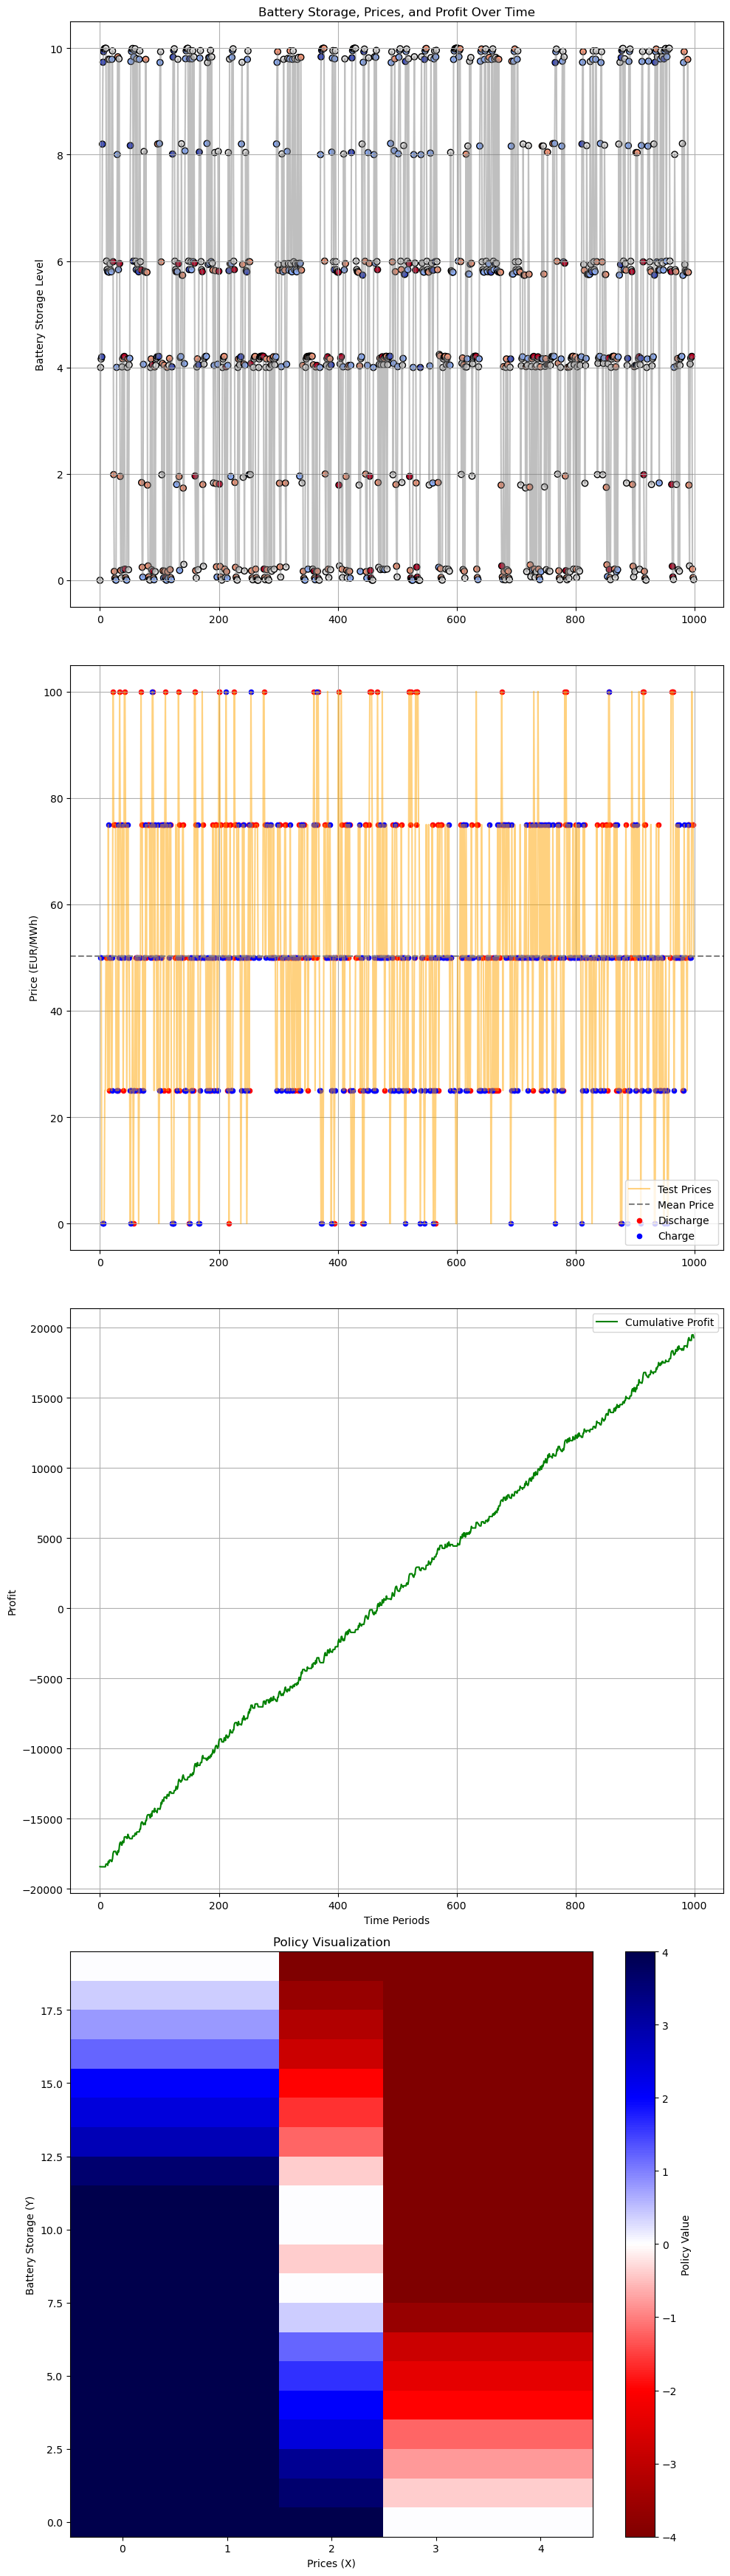

In [260]:
battery_storage_sim, profit_sim = model.simulate()
model.plot_results(battery_storage_sim, profit_sim)

Converged in 927 iterations.


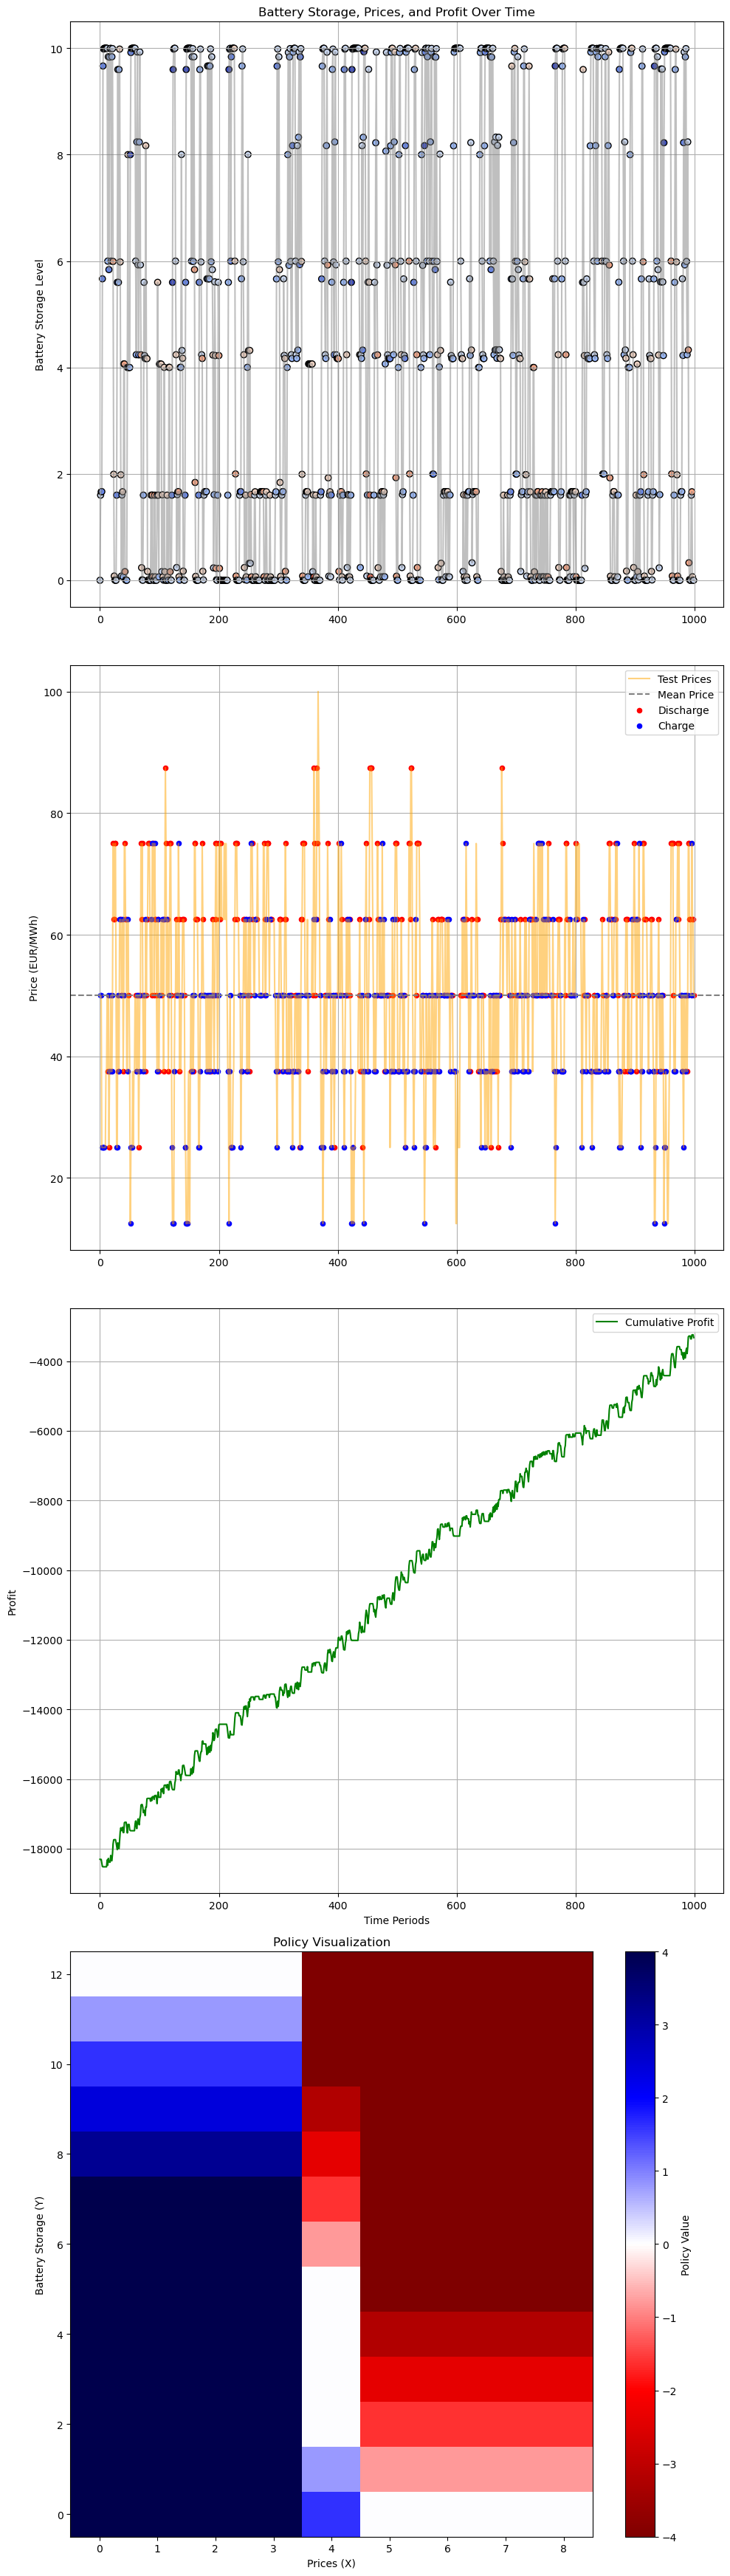

In [129]:
# Example Usage:
model = EnergyStorageModel(eta_charge=0.98, 
                           eta_discharge=0.97, 
                           beta = 0.99,
                           a_bar = 4,
                           num_storage_levels=13,
                           num_actions=11,
                           num_price_levels=9,
                           simulate_prices = True)
v1, p1 = model.value_function_iteration()
battery_storage_sim, profit_sim = model.simulate()
model.plot_results(battery_storage_sim, profit_sim)

In [138]:
np.allclose(p1,p2)
p1-p2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## ETA LO

In [ ]:
model_2 = EnergyStorageModel(price_data_path='../data/entsoe_price_DK_1_20150101_20240101.csv',
                             eta_charge=0.85,
                             eta_discharge=0.85,
                             num_actions=13)
model_2.compute_price_transitions()
V2, P2 = model_2.value_function_iteration()
battery_storage_sim, profit_sim = model_2.simulate()
model_2.plot_results(battery_storage_sim, profit_sim)
